## FB Ad Analytics
In 2019, Facebook ad revenue stood close to 70B, a new record high and a significant increase in comparison to the previous years. When it comes to analysing the facebook adverts dataset, we can ask so many questions. However, without knowing anything about company's marketing strategy and campaign objective, we dn't know which KPIs are most relevant and, in particular, actionable. This workbook is meant for a gental introduction to look at the data, coming up with some hypothetic quesitons that can be answered with the data.

In [1]:
import os
from pandas import *
import numpy as np
import seaborn as sns

In [2]:
data = read_csv('KAG_conversion_data.csv')

In [3]:
#take a quick look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
#for numerical variables
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
#for categorical variables
for v in data.columns:
    if data[v].dtype == 'object':
        print(data[v].value_counts())

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64
M    592
F    551
Name: gender, dtype: int64


In [6]:
#add another numerical value for age for easier interpretation
def age_num(x):
    if x == '30-34':
        age = 32
    elif x == '35-39':
        age = 37
    elif x =='40-44':
        age = 42
    elif x =='45-49':
        age = 47
    else:
        raise Exception('Age range not defined')
    return age

data['age_n']=data['age'].apply(age_num)
data

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_n
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,32
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,32
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,32
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,32
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,32
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,47
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,47
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,47
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,47


Some of the column descriptions:

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad

### Create additional features 

In [7]:
# it looks like total_conversion could be higher than number of clicks?
data[data['Total_Conversion']>data['Clicks']].count()

ad_id                  218
xyz_campaign_id        218
fb_campaign_id         218
age                    218
gender                 218
interest               218
Impressions            218
Clicks                 218
Spent                  218
Total_Conversion       218
Approved_Conversion    218
age_n                  218
dtype: int64

In [8]:
#Some standard metrics are missing here

#calculate Click Through Rate
data['CTR']=data['Clicks']/data['Impressions']*100

#Conversion Rate-- if we assume the company define conversion as number of people enquired about the product
data['CR']=data['Total_Conversion']/data['Impressions']

#Cost per click
data['CPC']=data['Spent']/data['Clicks']

#Cost per Conversion
data['CPCon']=data['Spent']/data['Total_Conversion']

In [9]:
data[data.isin([np.nan, np.inf, -np.inf]).any(1)]

#change na value to 0
data=data.replace([np.nan, np.inf, -np.inf], 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE6CFECD48>,
      dtype=object)

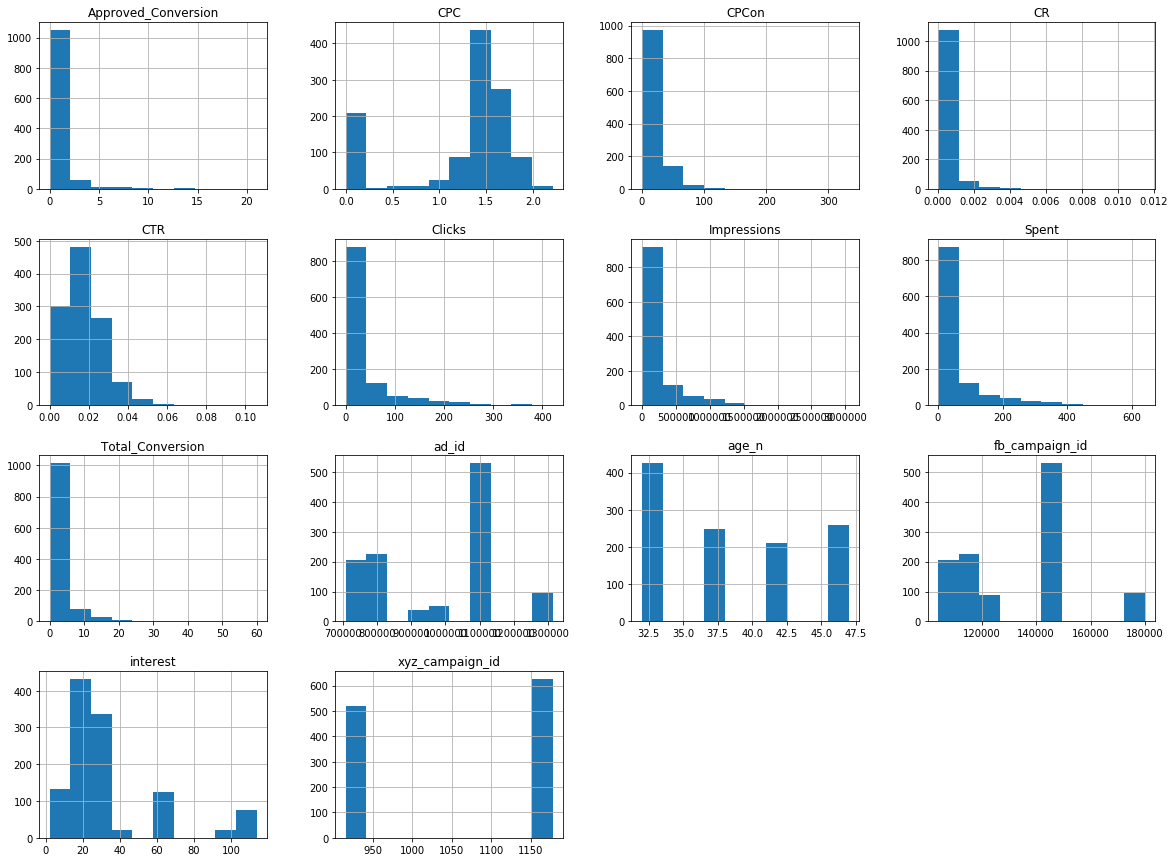

In [10]:
#Now let's look at the key metrics in histogram
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(figsize=(20,15))

In [11]:
data.columns

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'age_n', 'CTR', 'CR', 'CPC', 'CPCon'],
      dtype='object')

# explore more information


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE6C2C7C08>,
      dtype=object)

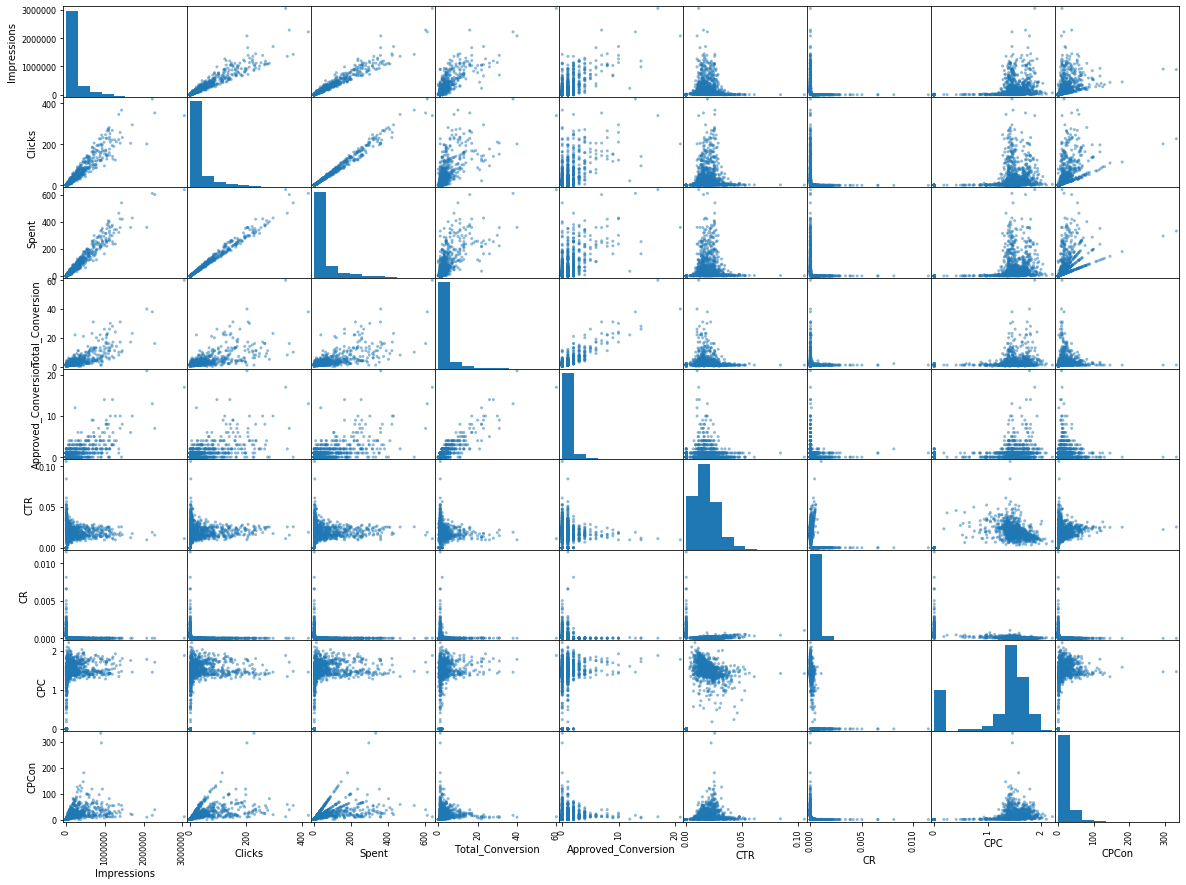

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR', 'CR', 'CPC', 'CPCon']
scatter_matrix(data[attributes], figsize = (20,15))

In [23]:
# or another way to view the correlation
corr= data[attributes].corr()
corr

,Impressions,Clicks,Spent,CPC,Total_Conversion,Approved_Conversion
Impressions,1.000000,0.948514,0.970386,0.329214,0.812838,0.684249
Clicks,0.948514,1.000000,0.992906,0.296515,0.694632,0.559526
Spent,0.970386,0.992906,1.000000,0.315671,0.725379,0.593178
CPC,0.329214,0.296515,0.315671,1.000000,0.234620,0.203781
Total_Conversion,0.812838,0.694632,0.725379,0.234620,1.000000,0.864034
Approved_Conversion,0.684249,0.559526,0.593178,0.203781,0.864034,1.000000


We can see here that spent is highly correlated to clicks then impressions. It's likely that the advertisement is bought mainly on clicks. Conversion and approved conversion seems to be correlated to spend as well, but the pattern is harder to observe. There are also seem to be multiple grouped lines spend and cpcon, which maybe interesting to investaget further

Background info: When business create their own campaign on facebook, they can choose to get charged by link click or impression, ie cost per click or cost per mille (K impressions)

In [13]:
list(data['age'].unique())

['30-34', '35-39', '40-44', '45-49']

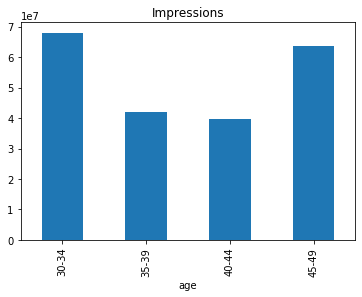

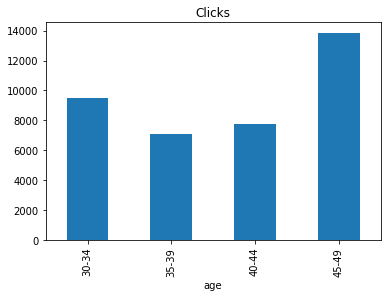

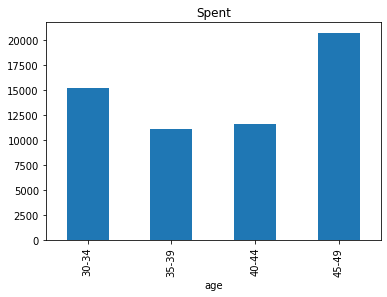

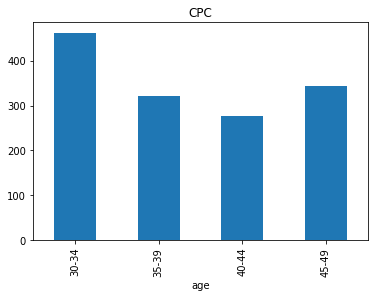

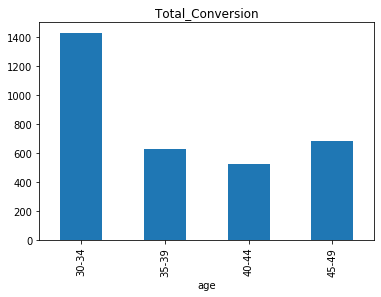

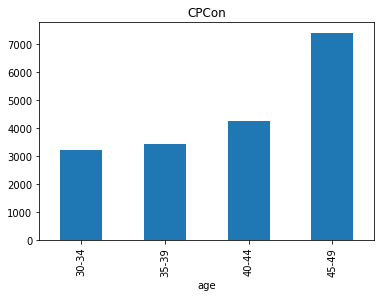

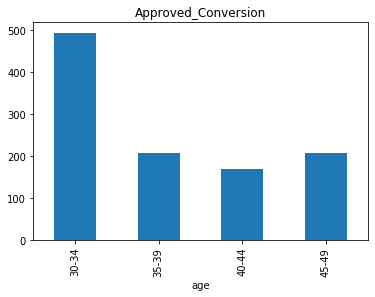

In [24]:
#further investigate some key attributes by group

attributes=['Impressions', 'Clicks','Spent','CPC','Total_Conversion','CPCon','Approved_Conversion']

for a in attributes:
    data_agg=data.groupby(['age'])[a].sum()
    data_agg.plot.bar()
    plt.title(a)
    plt.show()


Some interesting observations here:
1. Impression is highest for age group 30-34 and then 45-49, lower for people in between
2. 45-49 age group contributed more clicks than group 30-34
3. However, total conversion is significantly higer for group 30-34
4. Cost per click is higher for group 30-34 but cost per conversion is lowest

Hypothesis: The younger group only click on things they're interested, and more likely to convert after learning the inforamtion and the 45-49 group are more likely to click and less interested to buy? Is it a behaviroal thing?
Or could the advertisement be attracting a different demographic group than their desired? people in age 45-49 found the initial appearing interesting and clicks on it, but later find it less relevant to them? but 30-34 group are not attracted by inital look of the advertisement and found the description in the ad relevant to them?

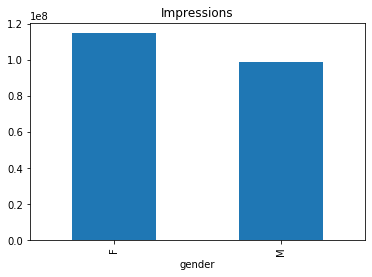

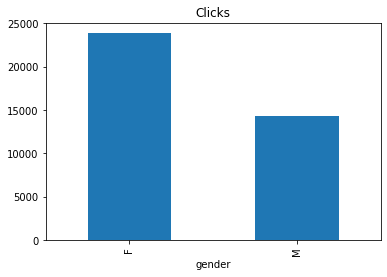

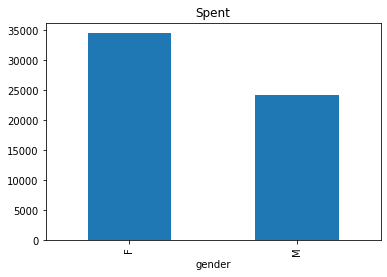

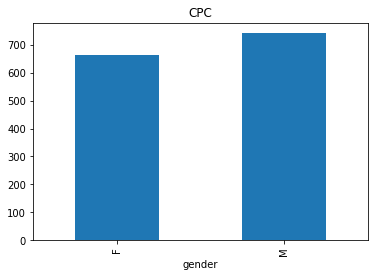

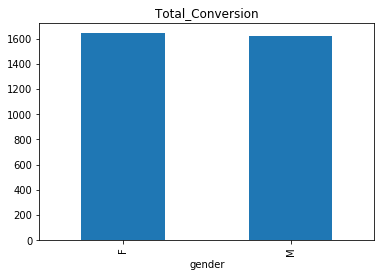

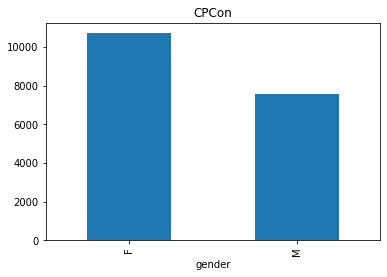

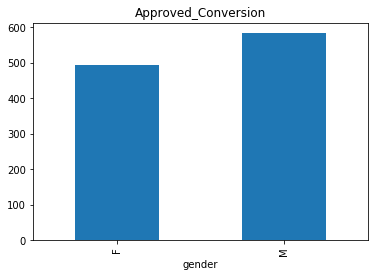

In [25]:
attributes=['Impressions', 'Clicks','Spent','CPC','Total_Conversion','CPCon','Approved_Conversion']

for a in attributes:
    data_agg=data.groupby(['gender'])[a].sum()
    data_agg.plot.bar()
    plt.title(a)
    plt.show()


Similar observation here; is the ad seem to be more attractive to female user at the first look? 
Also, ads shown more and clicked more by female, but total conversion is similar. Would it make sense to increase access of ad to male user?

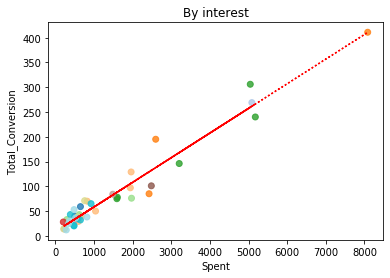

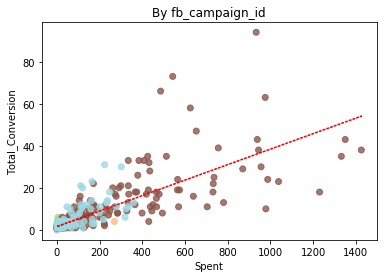

In [41]:
# Is it true that the more we spend, the better we get at conversion?
# let's look by interest first

attributes=['interest','fb_campaign_id']

for a in attributes:
    data_agg=data.groupby([a])[['Spent','Total_Conversion']].sum().reset_index()
    x=data_agg['Spent']
    y=data_agg['Total_Conversion']
    
    plt.scatter(x, y, alpha=0.8,c=data_agg[a], cmap='tab20')
    plt.xlabel('Spent')
    plt.ylabel('Total_Conversion')
    plt.title('By {0}'.format(a))

    z = np.polyfit(x,y,1)
    p =np.poly1d(z)
    plt.plot(x, p(x),':r')
    plt.show()

It looks like in general, we'd have more conversion when we spend more. It's normal to have better and worse performance around the trend line. And it's  obvious that some campaign are outliers, in a good way. It maybe intersting to investigate what is special about those campaigns. However, we don't have that informaion here. 

Now let's generate one common goal and build some simple model to extract more information

## Generate one goal

So far we've been looking at impressions, clicks, conversions and total conversions. They're all good metrics, but to business, we still want to calculate the return on our investment. Let's assume an enquiry(conversion) is worth $5, and a sale (Approved conversion) is worth 100. And we can create one conversion value

In [58]:
data['ConValue'] = 5*data['Total_Conversion']+100*data['Approved_Conversion']
data['ROAS'] = data['ConValue']/data['Spent']

In [56]:
# summary stats is a good starting point, we can come up with things to investigate more
data_agg=data.groupby(['age','interest','gender','fb_campaign_id'])['Impressions','Clicks','Spent','ConValue'].sum().reset_index()
data_agg['ROAS'] = data_agg['ConValue']/data_agg['Spent']
data_agg.query('Spent>100').sort_values(by=['ROAS'], ascending=False)


,age,interest,gender,fb_campaign_id,Impressions,Clicks,Spent,ConValue,ROAS
4,30-34,2,M,144569,431800,59,104.290001,870,8.342123
59,30-34,16,M,144533,3243802,307,542.109999,4065,7.498478
370,35-39,65,M,144593,306311,67,100.370001,745,7.422537
90,30-34,21,M,144537,546558,58,109.930001,760,6.913490
163,30-34,29,M,144554,2529694,283,485.540004,3230,6.652387
...,...,...,...,...,...,...,...,...,...
683,45-49,110,F,179978,637549,120,173.880003,15,0.086266
557,45-49,16,F,115485,670539,171,269.240000,20,0.074283
107,30-34,25,F,144657,588617,119,169.919997,10,0.058851
552,45-49,15,F,144723,1221803,302,430.019999,20,0.046509


We can filter out some bigger items to optimize. For example Male with age 30-34 with interest group 2 fo campaign 144569 maybe can increase investment as ROAS is above 8. On the contrary, Female in age 45-49 with interst 15 can be optimized, it's not generating much value from it